### Preprocessing

In [2]:
import librosa
import numpy as np
from skimage.transform import resize
import os
import keras

In [3]:
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 
          'jazz', 'metal', 'pop', 'reggae', 'rock']


model = keras.models.load_model('./BadBoyModelV2.keras')

In [60]:
# audio_files['jazz'] 

#### Prediction

In [61]:
audio = librosa.core.load('./Data/genres_original/country/country.00008.wav')
mel_specs = []
y = audio[0]
sr = audio[1]

spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
spect = librosa.power_to_db(spect, ref=np.max)
# On modifie la taille des images 128 x 660 en gardant les paramètres proposés dans l'article initial
if spect.shape[1] != 600:
    # spect.resize(128,660, refcheck=False)
    spect = spect[:128,:600]
    # print(spect.shape)
    spect.reshape(128,600)

mel_specs.append(spect)
    
X = np.array(mel_specs)

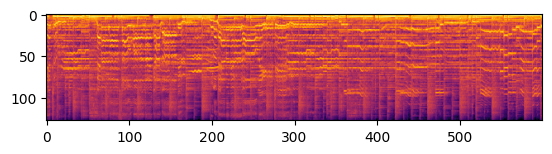

In [62]:
import matplotlib.pyplot as plt

plt.imshow(mel_specs[0], cmap="inferno")

In [63]:
X.shape

(1, 128, 600)

In [64]:
res = model.predict(X)

1/1 [==============================] - 0s 167ms/step


In [65]:
actual_best = 0
result_label = ""


predicted_class_index = np.argmax(res[0])
predicted_class_name = genres[predicted_class_index]
predicted_class_name
# for i in range(len(genres)):
#     actual = res[0][i]
#     if actual > actual_best:
#         actual_best = actual
#         result_label = genres[i]

# print(result_label, str(actual_best))

'pop'

In [66]:
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 
          'jazz', 'metal', 'pop', 'reggae', 'rock']

In [67]:
for i in genres:
    if 'blues' not in i:
        print(i)

classical
country
disco
hiphop
jazz
metal
pop
reggae
rock


#### Create img

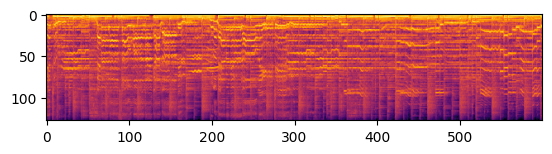

In [68]:
plt.imshow(mel_specs[0], cmap="inferno")

In [69]:
# Code pour créer votre image
plt.imshow(mel_specs[0], cmap="inferno")

# Spécifiez le chemin et le nom de fichier pour l'enregistrement
nom_fichier = "pred.png"

# Enregistrez l'image
# plt.savefig(nom_fichier)

# Assurez-vous de fermer la figure après l'enregistrement (pour éviter d'afficher une seconde fois)
plt.close()

#### Faire plusieurs pred

In [70]:
all_predictions = []

In [73]:
audio_dir = './Data/genres_original/country/'
for filename in os.listdir(audio_dir):
    # Chargez le fichier audio
    audio_path = os.path.join(audio_dir, filename)
    audio = librosa.core.load(audio_path)
    
    mel_specs = []
    y = audio[0]
    sr = audio[1]

    spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
    spect = librosa.power_to_db(spect, ref=np.max)

    if spect.shape[1] != 600:
            spect = spect[:128, :600]
        
    mel_specs.append(spect)
    
    X = np.array(mel_specs)
    res = model.predict(X)
    
    predicted_class_index = np.argmax(res[0])
    predicted_class_name = genres[predicted_class_index]
    all_predictions.append((filename, predicted_class_name))

In [72]:
# for i in all_predictions:
#     pred = i[1]
#     name_song = i[0]
#     print(name_song, pred)

#### Réentrainer le model